In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [3]:
LambdaCDM_settings = {'omega_b':0.0223828,
                     'omega_cdm':0.1201075,
                     'h':0.67810,
                     'A_s':2.100549e-09,
                     'n_s':0.9660499,
                     'tau_reio':0.05430842,
                     'output':'mPk',
                     'P_k_max_1/Mpc':3.0,
                     # The next line should be uncommented for higher precision (but significantly slower running)
                     'ncdm_fluid_approximation':3,
                     # You may uncomment this line to get more info on the ncdm sector from Class:
                     'background_verbose':1
                    }

neutrino_mass_settings = {'N_ur':0.00441,
                          'N_ncdm':3,
                          'm_ncdm':'0.10,0.10,0.10'
                         }

In [4]:
neutrino_mass_settings

{'N_ur': 0.00441, 'N_ncdm': 3, 'm_ncdm': '0.10,0.10,0.10'}

In [5]:
LambdaCDM = Class()
LambdaCDM.set(LambdaCDM_settings)
LambdaCDM.compute()

neutrino = Class()
neutrino.set(LambdaCDM_settings)
neutrino.set(neutrino_mass_settings)
neutrino.compute()

In [6]:
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc

Pk_LambdaCDM = np.zeros(len(kk)) # P(k) in (Mpc/h)**3
Pk_neutrino = np.zeros(len(kk))

h = LambdaCDM_settings['h'] # get reduced Hubble for conversions to 1/Mpc

for i,k in enumerate(kk):
    Pk_LambdaCDM[i] = LambdaCDM.pk(k*h,0.)*h**3 # function .pk(k,z)
    Pk_neutrino[i] = neutrino.pk(k*h,0.)*h**3 # function .pk(k,z)


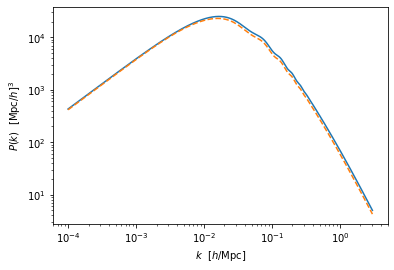

In [7]:
plt.figure()
plt.loglog(kk,Pk_LambdaCDM)
plt.loglog(kk,Pk_neutrino,linestyle='--')
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.show()

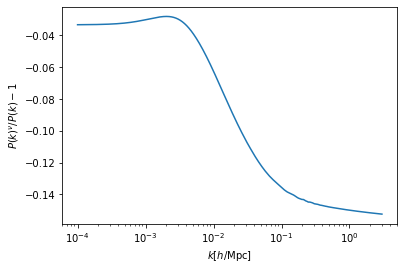

In [8]:
plt.figure()
plt.semilogx(kk,Pk_neutrino/Pk_LambdaCDM-1)
plt.xlabel(r'$k [h /\mathrm{Mpc}]$')
plt.ylabel(r'$P(k)^\nu/P(k)-1$')
plt.show()

In [9]:
def dict_results(spectrum):
    Dict_S = {'age': spectrum.age(),
        'Neff': spectrum.Neff(),
        'omega_b': spectrum.omega_b(),
        'Omega0_cdm':spectrum.Omega0_cdm(),
        'h':spectrum.h(),
        'Omega0_k':spectrum.Omega0_k(),
        'Omega0_m': spectrum.Omega0_m(),
        'Omega_b': spectrum.Omega_b(),
        'Omega_g': spectrum.Omega_g(),
        'Omega_lambda': spectrum.Omega_Lambda(),
        'Omega_m': spectrum.Omega_m(),
        'Omega_r': spectrum.Omega_r(),
        'rs_drag': spectrum.rs_drag(),
        'Sigma8': spectrum.sigma8(),
        'Sigma8_cb': spectrum.sigma8_cb(),
        'T_cmb': spectrum.T_cmb(),
        'theta_s_100': spectrum.theta_s_100(),
        'theta_star_100': spectrum.theta_star_100(),  
        'n_s':spectrum.n_s(),
        'tau_reio':spectrum.tau_reio()
         }
    return Dict_S


In [12]:
dict_n = dict_results(neutrino)
dict_L = dict_results(LambdaCDM)

In [13]:
print(dict_n)

{'age': 13.686306522671936, 'Neff': 3.0440046643602656, 'omega_b': 0.022382800000000005, 'Omega0_cdm': 0.26120569325001164, 'h': 0.6781, 'Omega0_k': 0.0, 'Omega0_m': 0.31688749481886624, 'Omega_b': 0.04867734979810887, 'Omega_g': 5.378150968509927e-05, 'Omega_lambda': 0.6830584134315361, 'Omega_m': 0.31688749481886624, 'Omega_r': 5.4091749597715606e-05, 'rs_drag': 147.01363518534924, 'Sigma8': 0.7655787141490327, 'Sigma8_cb': 0.7806957045246775, 'T_cmb': 2.7255, 'theta_s_100': 1.0497110913535503, 'theta_star_100': 1.0520662868125528, 'n_s': 0.9660499, 'tau_reio': 0.05430842}


In [14]:
print(dict_L)

{'age': 13.770597733785934, 'Neff': 3.0439999999999996, 'omega_b': 0.022382800000000005, 'Omega0_cdm': 0.26120569325001164, 'h': 0.6781, 'Omega0_k': 0.0, 'Omega0_m': 0.30988304304812053, 'Omega_b': 0.04867734979810887, 'Omega_g': 5.378150968509927e-05, 'Omega_lambda': 0.6900259954953076, 'Omega_m': 0.30988304304812053, 'Omega_r': 9.09614565717917e-05, 'rs_drag': 147.0713808247393, 'Sigma8': 0.825055787187691, 'Sigma8_cb': 0.825055787187691, 'T_cmb': 2.7255, 'theta_s_100': 1.0417961947906842, 'theta_star_100': 1.0441437219459013, 'n_s': 0.9660499, 'tau_reio': 0.05430842}


In [15]:
print(dict_n['age'])

13.686306522671936
